# Ensemble Leaning for Greater Model Performance

In this notebook we will set out to increase our model performance by stacking multiple classification algorithms to yield a higher accuracy when predicting churn rates of employees. This dataset was generated by IBM in order to predict employee turnover given 40+ features ranging from Education level, salary, commute times, and job satisfaction. The goal of this notebook will not be to create the MOST accurate classifier, but rather a demonstration on how simple stacking and majority voting can improve a model's performance. With this in mind, there will not be as much hyper-parameter tuning or feature engineering as there are in my other notebooks.

## Exploratory Data Analysis

We will begin by reading in our data, checking for missing values, and taking a peek at the information contained.  We see that there are no missing values for any of our features. Some features immediately pop out as seeming significant to whether or not an employee will leave the company, however the judgement of how significant these features are cannot be made immediately. Going forward I would guess the following may have some correlation with attrition:

1. Salary (in the form of hourly or monthly rate) 
2. Total Working Years 
3. Age 
4. Job Satisfaction
5. Distance from Home


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = pd.read_csv('IBMHR.csv')

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can create some bivariate probability distributions to analyze any patterns between any variables. These were hand picked from but more can be analyzed if necessary. We can see that Age vs Total working years correlates positively, which makes sense given that not many people take breaks in working after college. We can also see that there are two peaks in the Age vs. Years in current role, indicating that people tend to leave if they have stayed in a position between 4 to 6 years without a promotion.  Employees also tend to stay with the same manager the longer they are with the company given the positive linear relationship shown. Finally, there does not seem that large an influence on Job satisfaction based on the employees distance from home, which surprises me.

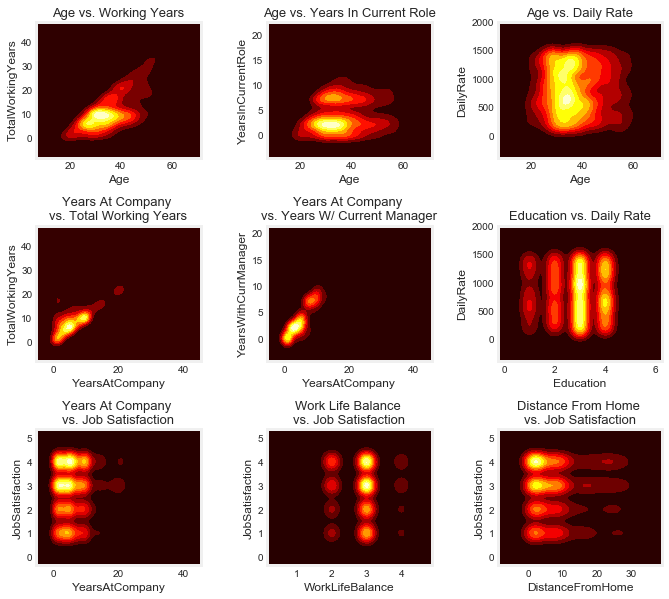

In [36]:
#check distributions
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
x = data['Age']
y = data['TotalWorkingYears']
sns.kdeplot(x, y, cmap='hot', shade=True, cut =5,  ax = axes[0,0])
axes[0,0].set_title('Age vs. Working Years', fontsize = 13)

x = data['Age']
y = data['YearsInCurrentRole']
sns.kdeplot(x, y, cmap='hot', shade=True, cut =5,  ax = axes[0,1])
axes[0,1].set_title('Age vs. Years In Current Role', fontsize = 13)

x = data['Age']
y = data['DailyRate']
sns.kdeplot(x, y, cmap='hot', shade=True, cut =5, ax = axes[0,2])
axes[0,2].set_title('Age vs. Daily Rate', fontsize = 13)

x = data['YearsAtCompany']
y = data['TotalWorkingYears']
sns.kdeplot(x, y, cmap='hot', shade=True, cut =5, ax = axes[1,0])
axes[1,0].set_title('Years At Company \nvs. Total Working Years', fontsize = 13)

x = data['YearsAtCompany']
y = data['YearsWithCurrManager']
sns.kdeplot(x, y, cmap='hot', shade=True,  cut =5, ax = axes[1,1])
axes[1,1].set_title('Years At Company \nvs. Years W/ Current Manager', fontsize = 13)

x = data['Education']
y = data['DailyRate']
sns.kdeplot(x, y, cmap='hot', shade=True, cut =5, ax = axes[1,2])
axes[1,2].set_title('Education vs. Daily Rate', fontsize = 13)

x = data['YearsAtCompany']
y = data['JobSatisfaction']
sns.kdeplot(x, y, cmap='hot', shade=True,  cut =5, ax = axes[2,0])
axes[2,0].set_title('Years At Company \nvs. Job Satisfaction', fontsize = 13)

x = data['WorkLifeBalance']
y = data['JobSatisfaction']
sns.kdeplot(x, y, cmap='hot', shade=True,  cut =5, ax = axes[2,1])
axes[2,1].set_title('Work Life Balance \nvs. Job Satisfaction', fontsize = 13)

x = data['DistanceFromHome']
y = data['JobSatisfaction']
sns.kdeplot(x, y, cmap='hot', shade=True, cut =5, ax = axes[2,2])
axes[2,2].set_title('Distance From Home \nvs. Job Satisfaction', fontsize = 13)

f.subplots_adjust(wspace = .4, hspace = .5)
#f.tight_layout()

In [37]:
#Encode Attrition to numerical
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})

Creating a general correlation plot, we can get an overview of how our features correlate with one another. Most of the features seem uncorrelated, with the few similar variable highly correlated (i.e years in current role/years with manager/etc.). Surprisingly there is no strong correlation between any of the variables and attrition, indicating that predicting this may be a bit challenging  

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5]),
 <a list of 25 Text xticklabel objects>)

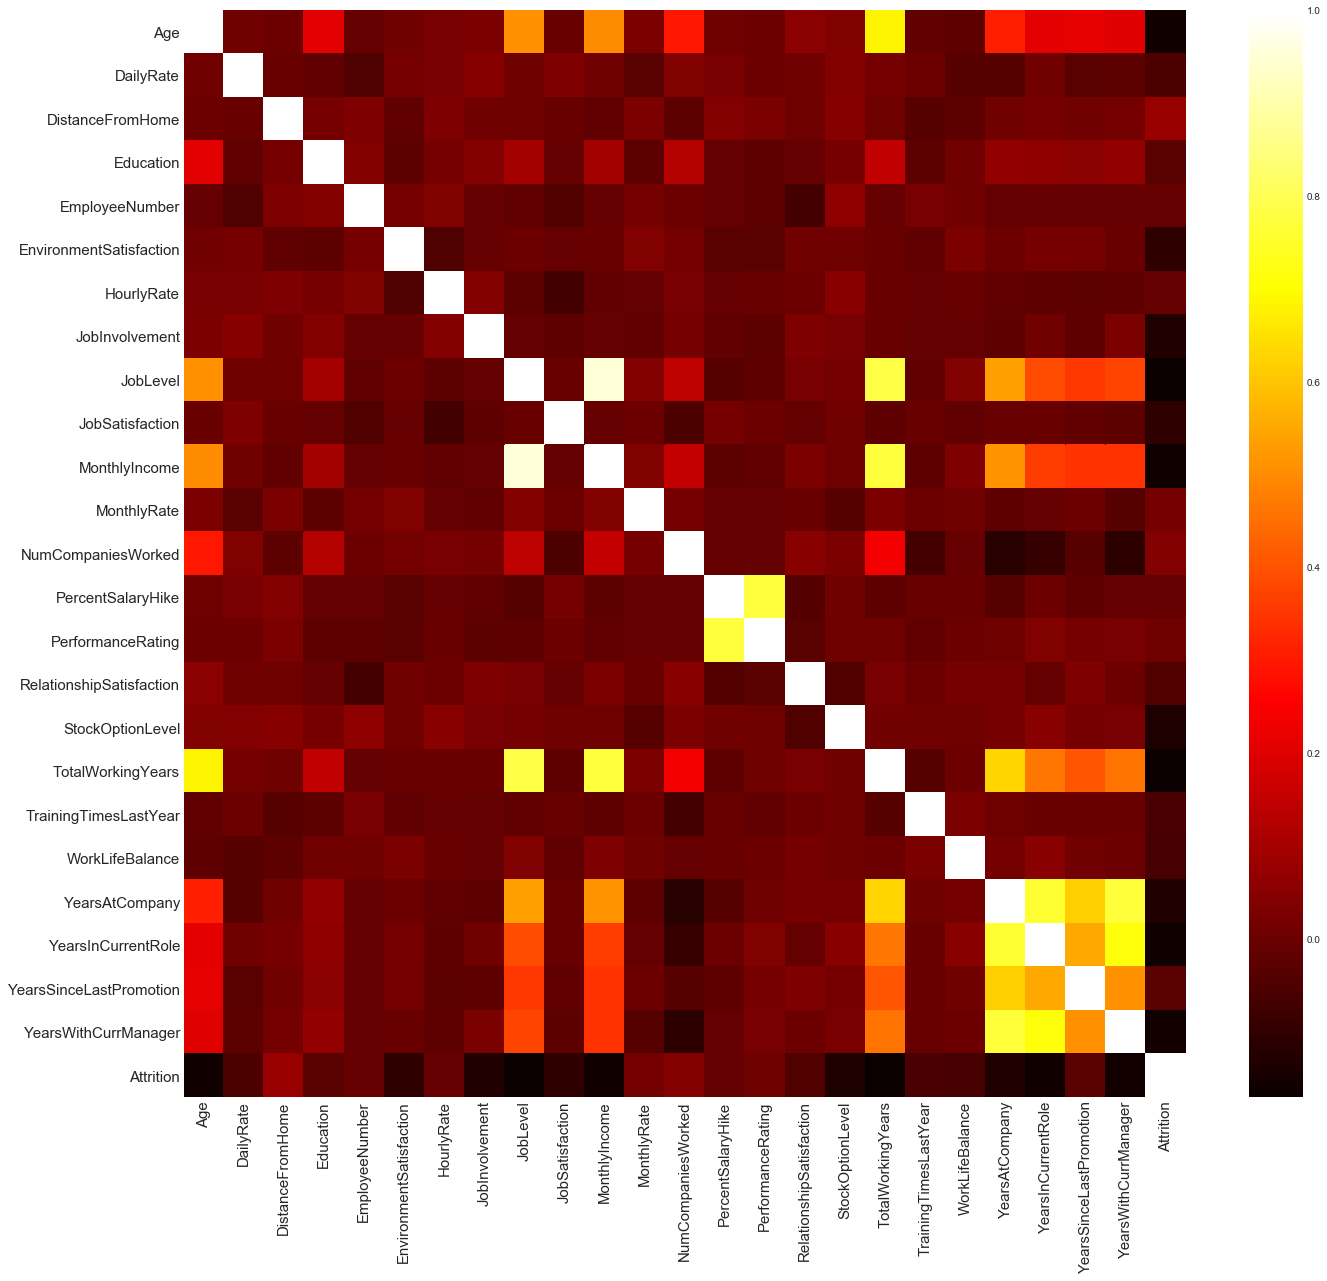

In [40]:
#Correlation map
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager', 'Attrition']

plt.subplots(figsize = (20,20))
sns.heatmap(data[numerical].corr(), cmap = 'hot', annot = False , cbar = True)
plt.yticks(fontsize = 15, rotation = 0)
plt.xticks(fontsize = 15, rotation = 90)

## Data Preprocessing and ML Implementation

Since none of our data is missing, the only preprocessing left to do is to map our categorical variables to numeric, split our target feature from the rest, and create a train/test set. As far as our machine learning model goes, we will be implementing 6 different classifiers:

1. K-Nearest Neighbor
2. Naive Bayes
3. Random Forest
4. Extremely Randomized Trees
5. Gradient Boosted Machine
6. Adaptive Boosting

We will then do a simple majority vote from the predictions of each classifier in order to make our final prediction.

In [41]:
X = data.drop('Attrition', axis = 1)
X = pd.get_dummies(X)
data['Attrition'] = data['Attrition'].map({1:'Yes',0:'No'})
y = data['Attrition']

In [176]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [177]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

In [178]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, nb_pred)


In [179]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

rf_params = {
    'n_estimators': 6000,
    'max_features': 0.3,
    'max_depth': None,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0,
    'criterion': 'gini'
}

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

In [180]:
et_params = {
    'n_estimators': 10000,
    'warm_start':True,
    'max_features': 0.4,
    'max_depth': 12,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
    'verbose': 0
}

et = ExtraTreesClassifier(**et_params)
et.fit(X_train, y_train)
et_pred = et.predict(X_test)
et_acc = accuracy_score(y_test, et_pred)

In [181]:
gb_params ={
    'n_estimators': 5000,
    'max_features': 0.9,
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

gbm = GradientBoostingClassifier(**gb_params)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
gbm_acc = accuracy_score(y_test, gbm_pred)

In [182]:
ada_params ={
    'n_estimators': 5000,
    'learning_rate' : 0.01,
}

ada = AdaBoostClassifier(**ada_params)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)

Here we can see the accuracy of our individual models. Random Forest and the Gradient boosted machine produced the best results, while KNN and naive bayes fell short. Looking at the correlations between the classifiers, we can see that none of them are completely correlated with the others but some do tend to predict in the same fashion as the others (RF and ET for example). We will see if we can improve these results by taking a vote between the classifiers. 

In [184]:
pred_all = pd.DataFrame({'nb':nb_pred, 'rf':rf_pred, 'et':et_pred, 'gbm':gbm_pred,'knn':knn_pred, 'ada':ada_pred})
acc_all = pd.DataFrame([nb_acc, rf_acc, et_acc, gbm_acc, knn_acc, ada_acc ], index = ['nb','rf','et','gbm', 'knn', 'ada'])
print(acc_all)

            0
nb   0.721088
rf   0.887755
et   0.874150
gbm  0.877551
knn  0.721088
ada  0.870748


In [185]:
for col in pred_all.columns:
    pred_all[col] = pred_all[col].map({'Yes':1, 'No':0})

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

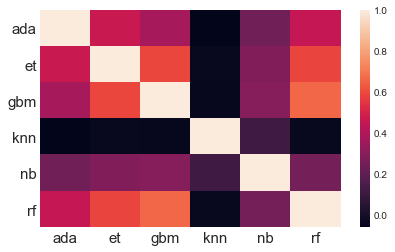

In [186]:
sns.heatmap(pred_all.corr())
plt.yticks(fontsize = 15, rotation = 0)
plt.xticks(fontsize = 15)

Here we create our final predictions by combining all our predictions into one data frame. Since the an employee leaving the company corresponds to 1, we will add up all the predictions and those with 3 or higher (meaning atleast three classifiers predicted 'Yes') votes will end up being 'Yes', and everything else a 'No'.

Doing this results in an accuracy of 89.11%, beating our all out other classifier individually. Although this was a marginal increase off the Random Forest classifier, it was a very simple and inexpensive way to improve our model. Given datasets in which classifying correct is of paramount importance (detecting cancer, minefields, etc), this slight increase in performance is well worth the time and effort.

In [196]:
pred_all = pd.DataFrame({'nb':nb_pred, 'rf':rf_pred, 'et':et_pred, 'gbm':gbm_pred,'knn':knn_pred, 'ada':ada_pred})

for col in pred_all.columns:
    pred_all[col] = pred_all[col].map({'Yes':1, 'No':0})
final_pred = (pred_all['gbm'] + pred_all['rf'] + pred_all['nb'] + pred_all['et'] + pred_all['knn'] + pred_all['ada'] >2)
final_pred = final_pred.astype('int').map({1:'Yes', 0:'No'})
   

In [197]:
print(accuracy_score(y_test, final_pred))

0.891156462585
